#1. **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 **Reading the data**

In [2]:
df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx","Data")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

**There are 5000 rows and 14 columns in this dataset.**

In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**OBSERVATION:**

Numeric data columns (Interval or Ratio) are: Age, Experience, Income, Mortgage and CCAvg.

Ordinal Categorical columns are: Family and Education.

Nominal Categorical columns are: ID, ZIP Code, Securities Account, CD Account, Online, CreditCard, Personal Loan.

In [7]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Data type of column 'CCAvg' is float64, whereas remaining attributes are of type int64

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Observations:

'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.

Remaining numeric columns such as Age, Income, CCAvg, Mortgage seem to be fine and no data cleaning is required.

Columns with binary information such as Securities Account, CD Account, Online, CreditCard, Personal Loan are also clean.

In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values in any of the column attributes.

# 2.**CLEANING THE DATA**



Correlation of Experience attribute with other attributes

In [10]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Since Age and Experience are highly correlated (0.99), so we can drop the experience column.And Id column is also irrelevant so we will drop it. 

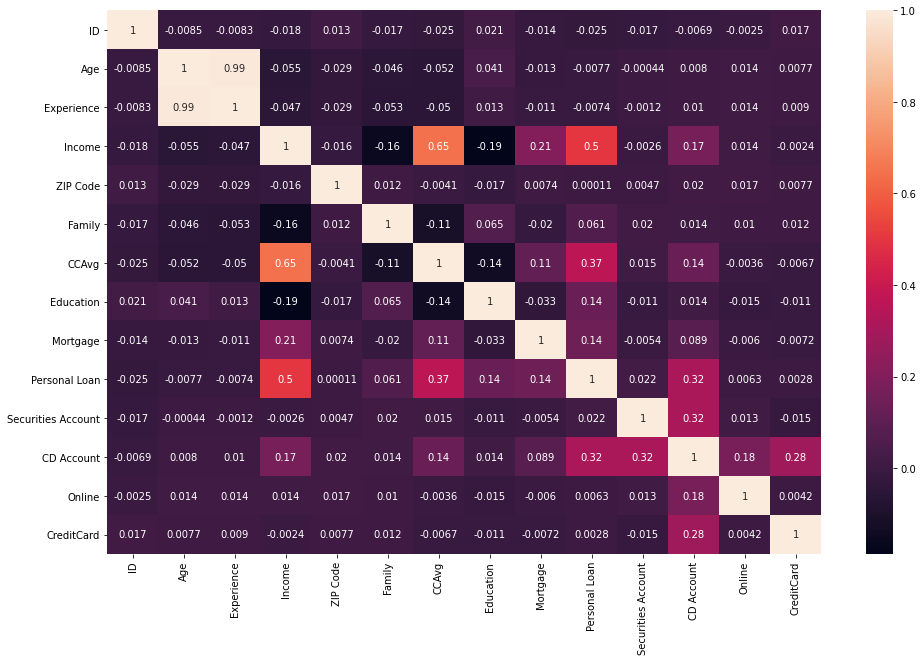

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
df1=df.drop(['Experience','ID'],axis=1)
df1.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# **EXPLORATORY DATA ANALYSIS**

In [13]:
df1.apply(lambda x: len(x.unique()))

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Categorical columns are Family,Education, Securities Account, CD Account, Online, CreditCard, Personal Loan.

Numeric data columns (Interval or Ratio) are: Age, Income, Mortgage and CCAvg.

We will drop ZIP Code because it is a nominal variable and has too many levels.Also it wil not affect the personal loan of people.

In [14]:
df2=df1.drop('ZIP Code',axis = 1)
df2.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [15]:
sum(df2['Mortgage']==0)

3462

So around 3462 customers has house mortgage value be zero.

In [16]:
sum(df2['CCAvg']==0)

106

So around 106 customers has zero average credit card spending per month.

Let us analayze the categorical columns:

Analyzing the Age attribute

In [17]:
df2['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

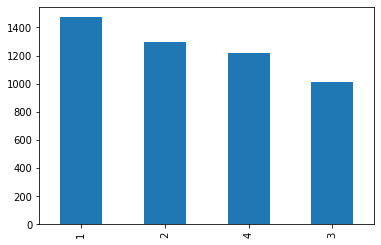

In [18]:
df2['Family'].value_counts().plot(kind = 'bar')

In [19]:
df2['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

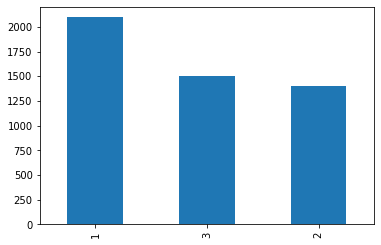

In [20]:
df2['Education'].value_counts().plot(kind = 'bar')

In [21]:
df2['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

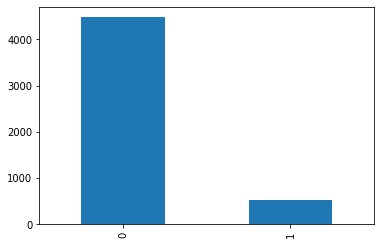

In [22]:
df2['Securities Account'].value_counts().plot(kind='bar')

In [23]:
df2['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

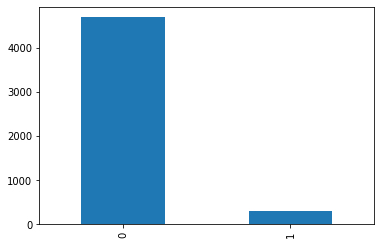

In [24]:
df2['CD Account'].value_counts().plot(kind='bar')

In [25]:
df2['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

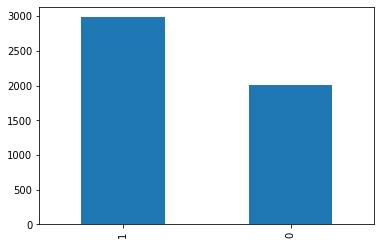

In [26]:
df2['Online'].value_counts().plot(kind='bar')

In [27]:
df2['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

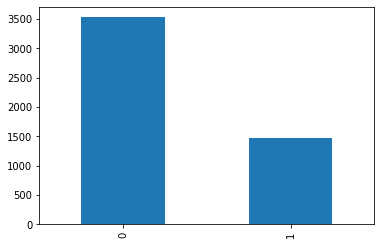

In [28]:
df2['CreditCard'].value_counts().plot(kind='bar')

UNIVARIATE ANALYSIS

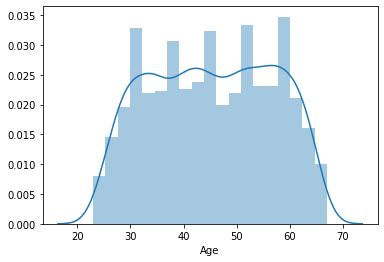

In [29]:
sns.distplot(df2.Age)

We can see Age has symmetric distribution.

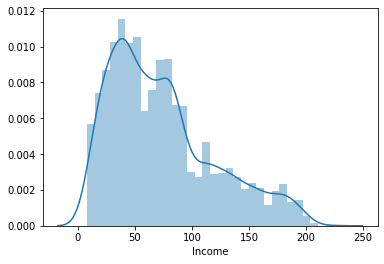

In [30]:
sns.distplot(df2.Income)

We can see Income is skewed distribution.Since Income is skewed distribution we need to transform it so that we can use it in our model otherwise it will result in a faulty model.
In logistic regression there is a  assupmtion that feature variable should have normal distribution. 

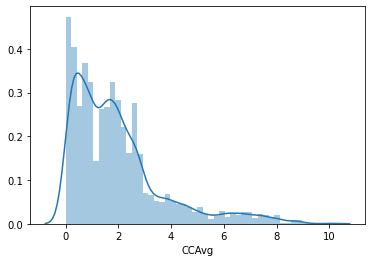

In [31]:
sns.distplot(df2.CCAvg)

We can see CCAvg is also skewed distribution. 

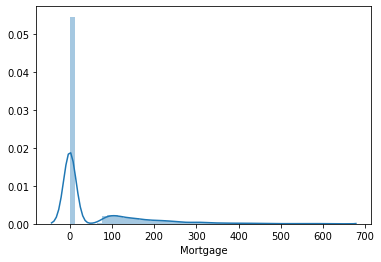

In [32]:
sns.distplot(df2.Mortgage)

We can see Mortgage is a skewed distribution.

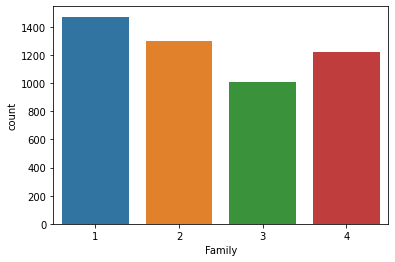

In [33]:
sns.countplot(df2.Family)

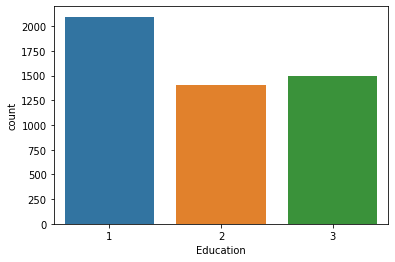

In [34]:
sns.countplot(df2.Education)

**MULTIVARIATE ANALYSIS**

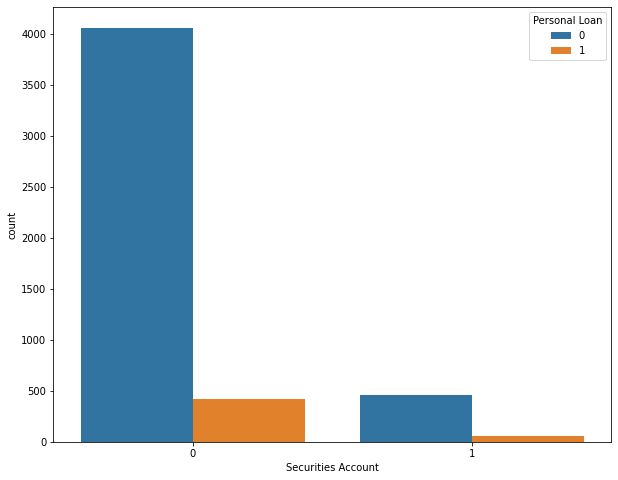

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(df2['Securities Account'],hue=df2['Personal Loan'])

In [36]:
pd.crosstab(df2['Securities Account'],df2['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Securities Account,,
0,90.620813,9.379187
1,88.505747,11.494253


We can see Customers with Securities account have slightly higher percentage of buying the personal loan than the customers with no Securities account.

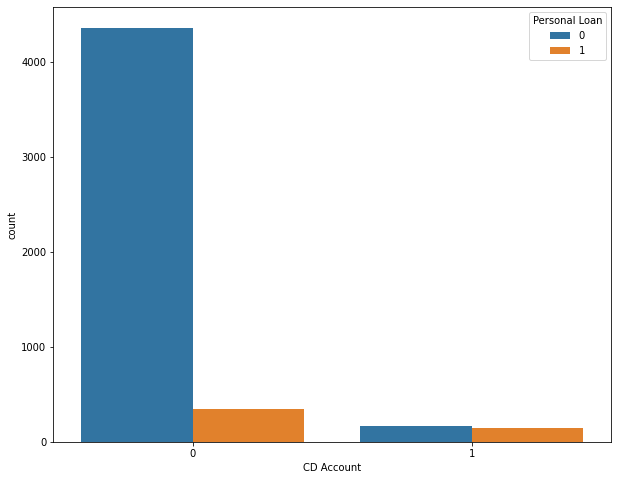

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(df2['CD Account'],hue=df2['Personal Loan'])

In [38]:
pd.crosstab(df2['CD Account'],df2['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CD Account,,
0,92.762878,7.237122
1,53.642384,46.357616


We can see Customers with CD account have very high percentage (46.3%) of buying the personal loan than the customers with no CD account (7.2%)

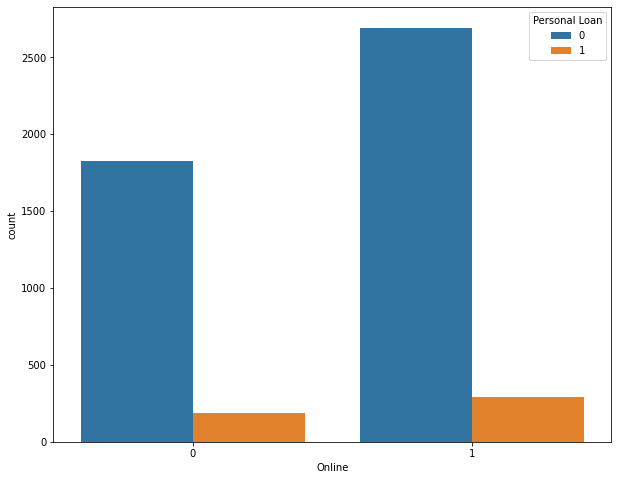

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df2['Online'],hue=df2['Personal Loan'])

In [40]:
pd.crosstab(df2['Online'],df2['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Online,,
0,90.625000,9.375000
1,90.247989,9.752011


 We can see Customer using internet banking facilities has no effect on buying the personal loans.

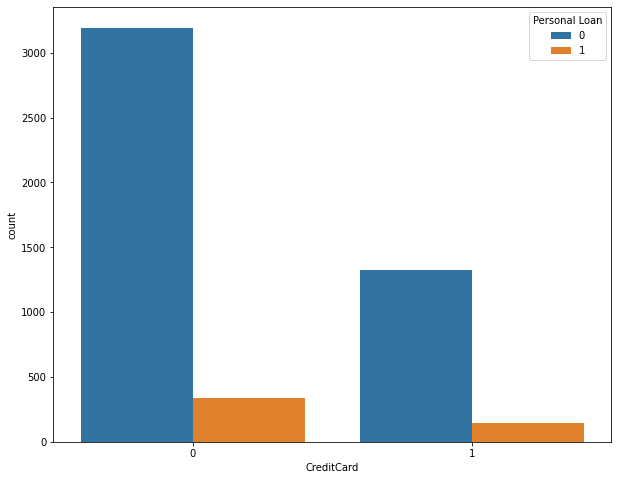

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(df2['CreditCard'],hue=df2['Personal Loan'])

In [42]:
pd.crosstab(df2['CreditCard'],df2['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CreditCard,,
0,90.453258,9.546742
1,90.272109,9.727891


We can see Customer using a credit card  has no effect on buying the personal loans.

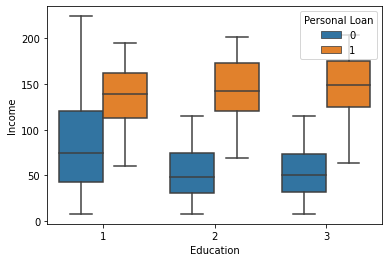

In [43]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df2)

We can see that in each education category customers with higher the income tend to buy personal Loans.

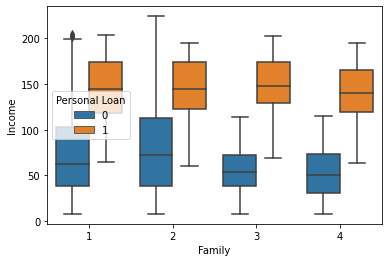

In [44]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df2)

We can see that for customers with 1,2,3 or 4 family members, higher income is an important factor to buy personal Loans.

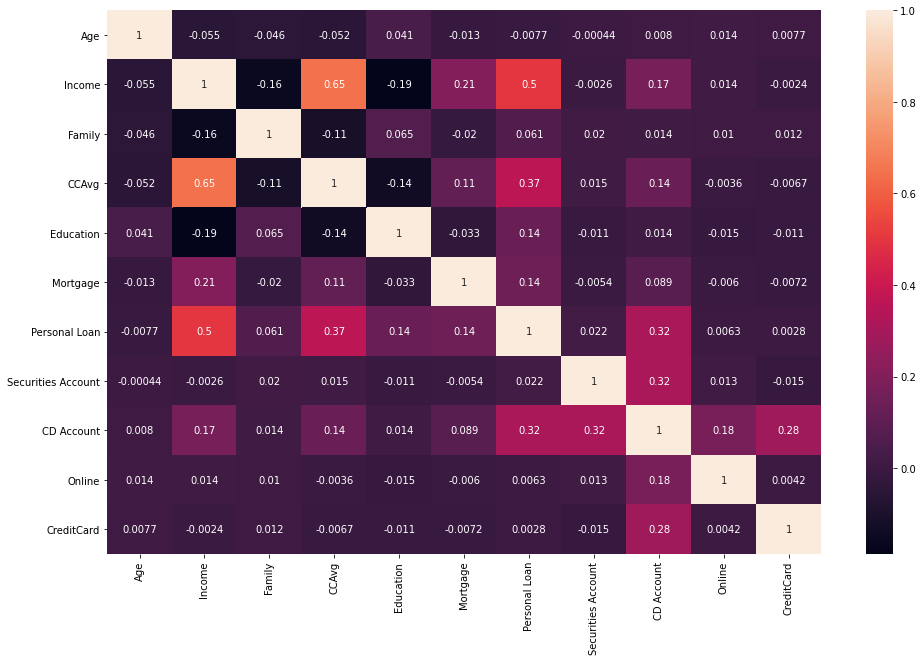

In [45]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr(),annot=True)

Income and CCAvg have higher correlation.Most of our variables seems to independent so it is good for our model building

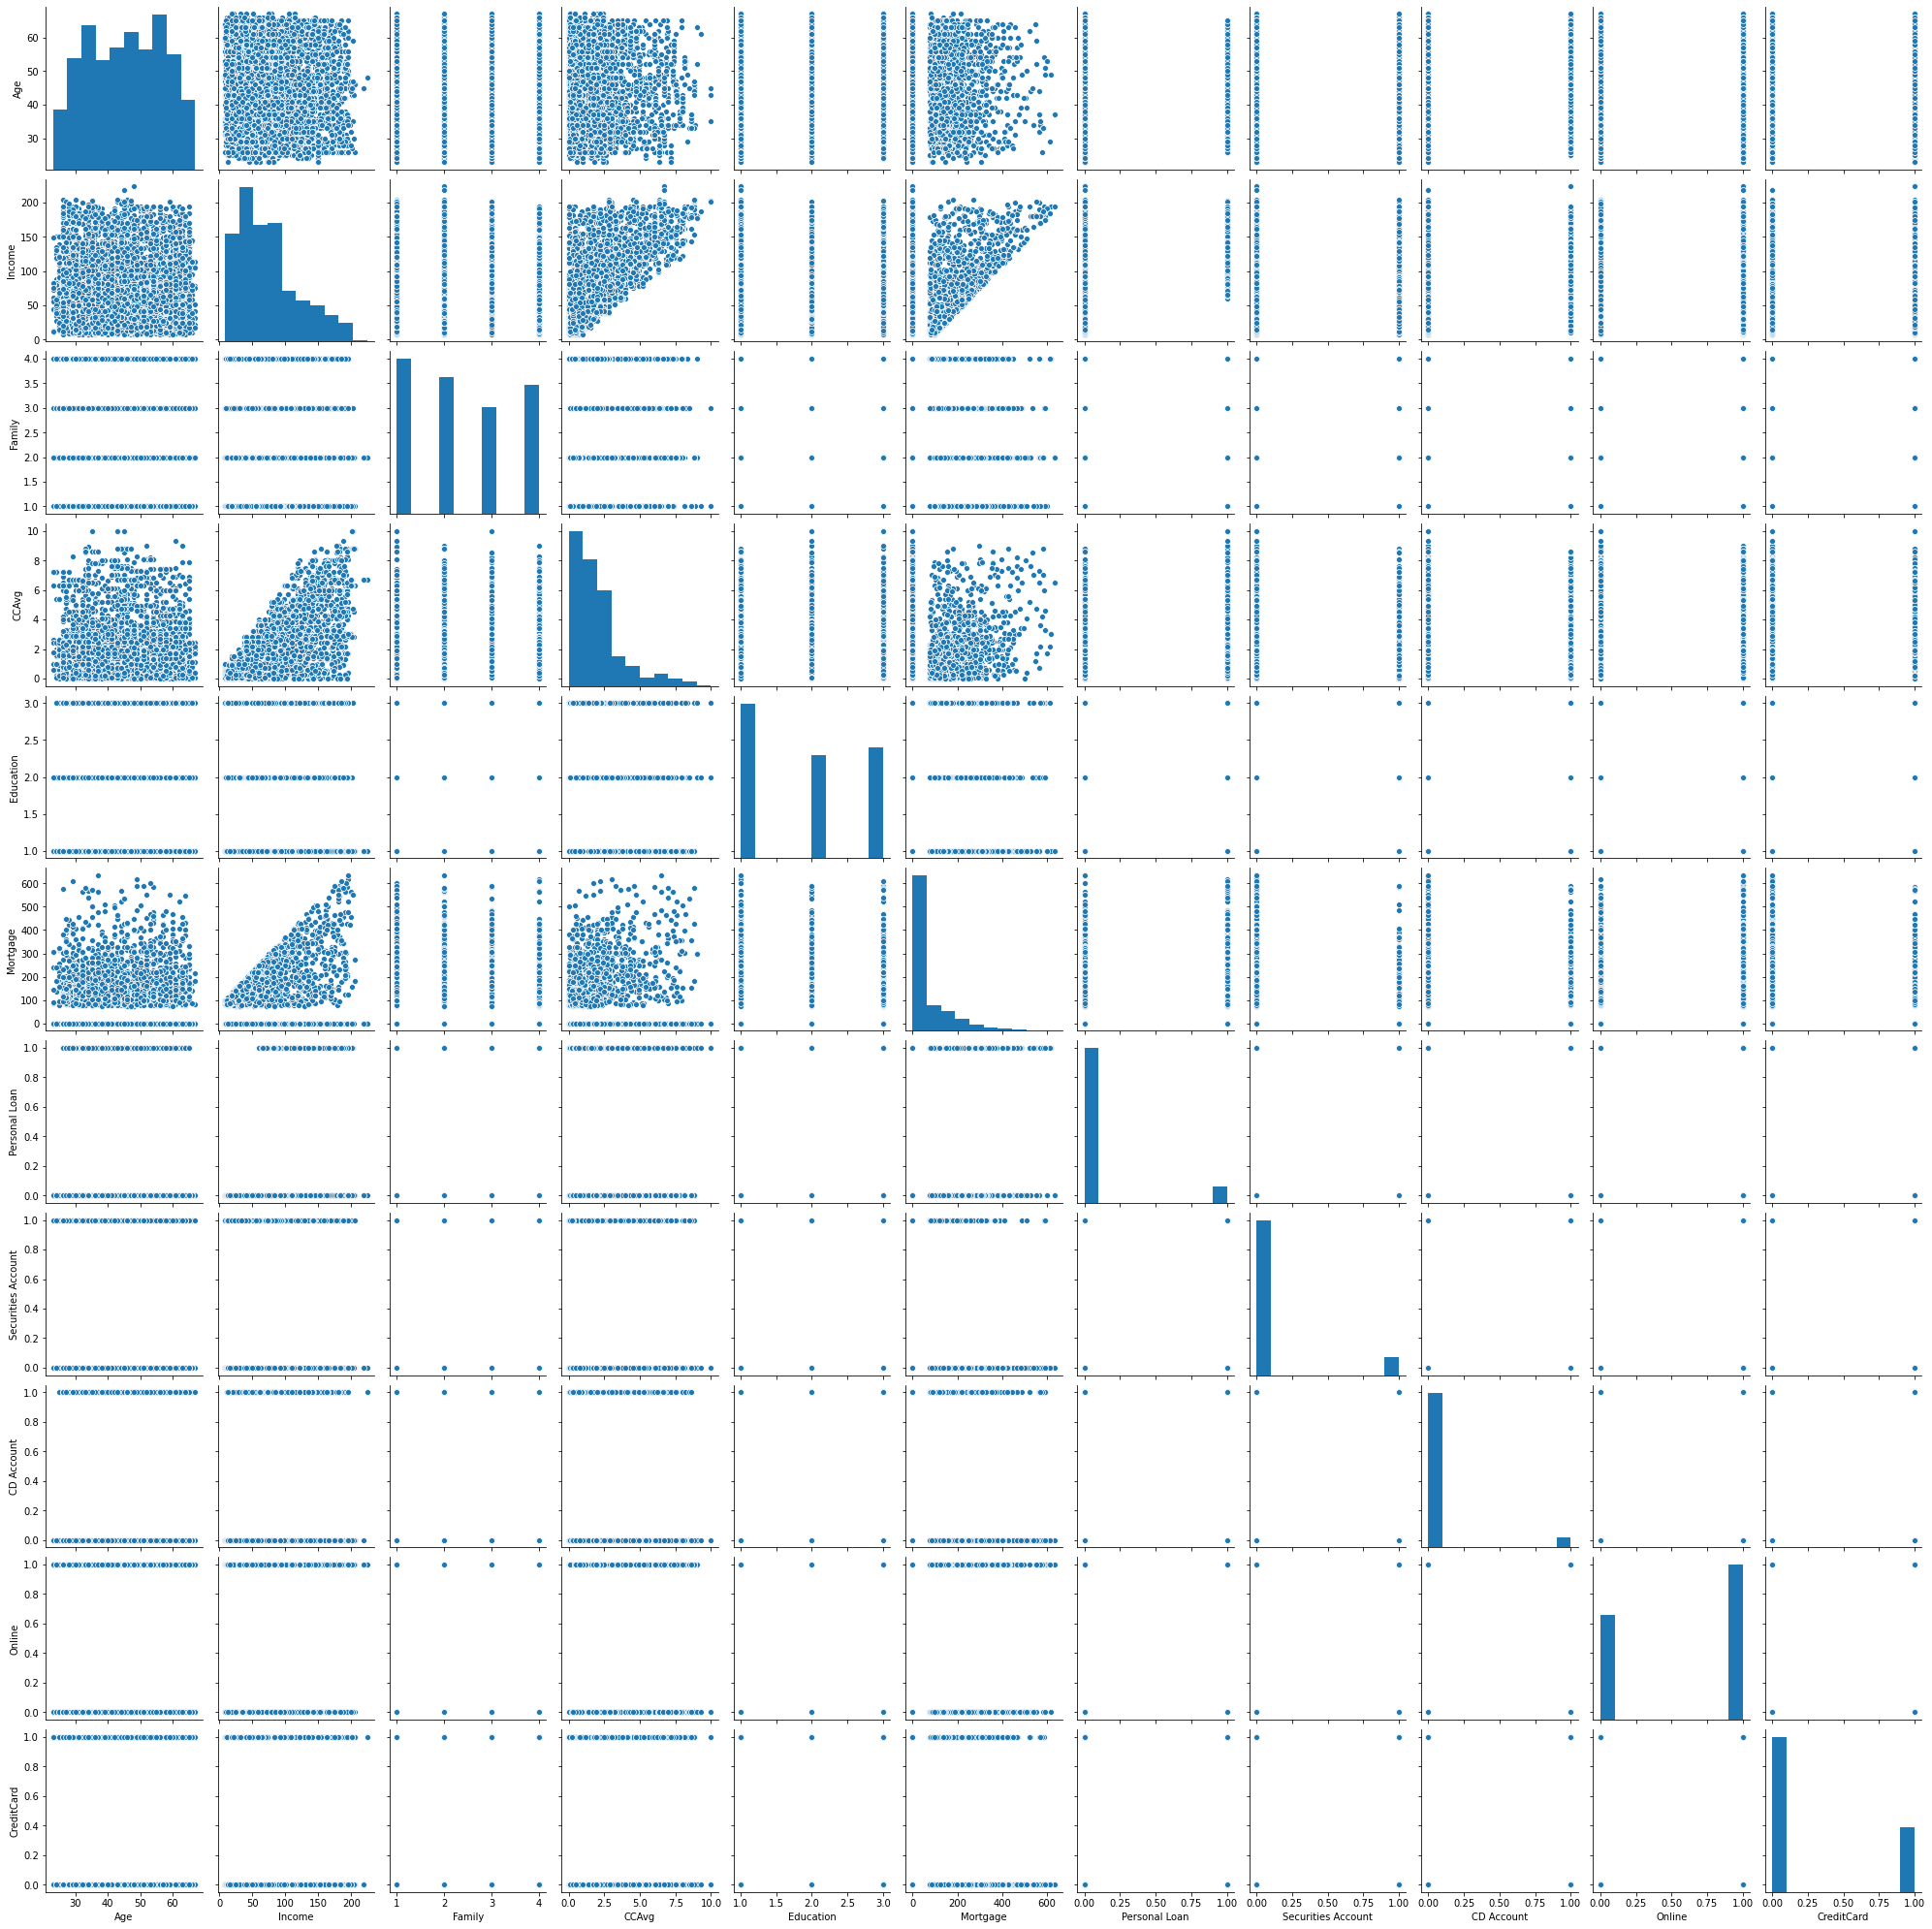

In [46]:
sns.pairplot(df2)

Observations:

Age has a positive linear relationship with Experience

Income, CCAvg, Mortgage histograms are not normally distributed

# **Transformations of Feature Variables**

In [47]:
df_X= df2[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
df_Y=df2['Personal Loan'].values

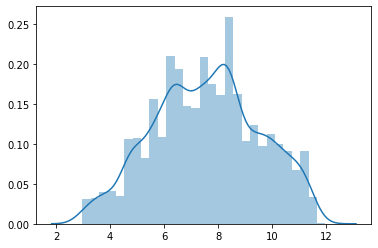

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df_X['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(df_X['Income'].values.reshape(-1,1)))

We can see Income is now symmetric.

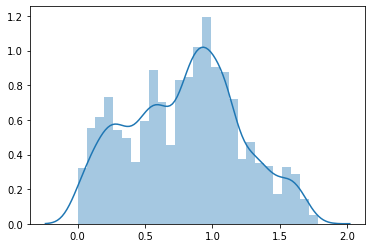

In [49]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df_X['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(df_X['CCAvg'].values.reshape(-1,1)))

We can see CCAvg is now symmetric.

In [50]:
df_X['New_Mortgage'] = pd.cut(df_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
df_X.drop('Mortgage',axis=1,inplace=True)

In [51]:
df_X.head()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,Securities Account,CD Account,New_Mortgage
0,25,49,4,1.6,0,0,1,1,0,0
1,45,34,3,1.5,0,0,1,1,0,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0


# **TRAINING AND TESTING DATA**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
X_train,X_test,Y_train,Y_test = train_test_split(df_X,df_Y,test_size = 0.3, random_state = 0,stratify =df_Y)
scx.fit_transform(X_train)
scx.transform(X_test)

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [54]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
Y_predict = model.predict(X_test)

In [69]:
from sklearn import metrics

In [57]:
print("Mean_Abs_Error:",metrics.mean_absolute_error(Y_test,Y_predict))
print("R2 score:",metrics.r2_score(Y_test,Y_predict))

Mean_Abs_Error: 0.051333333333333335
R2 score: 0.40849311701081603


In [58]:
print("Accuracy score for test data",metrics.accuracy_score(Y_test,Y_predict))

Accuracy score for test data 0.9486666666666667


In [59]:
print("Accuracy score for train data",metrics.accuracy_score(Y_train,model.predict(X_train)))

Accuracy score for train data 0.9494285714285714


In [60]:
from sklearn.metrics import confusion_matrix

print("The confusion matrix for logistic regression is: \n")
print(confusion_matrix(Y_test,Y_predict))

The confusion matrix for logistic regression is: 

[[1338   18]
 [  59   85]]


We can see in confusion matrix that the false negative is very much

In [61]:
from sklearn.metrics import classification_report
print("Detailed classification report for logistic regression is: \n")
print(classification_report(Y_test,Y_predict))

Detailed classification report for logistic regression is: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.59      0.69       144

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



Observations: We can see that although accuracy is good, f1-score is low in this case i.e., precision and recall values are not upto the mark especially recall value is low (.59) for class 1

Recall value of 59% means, out of all the customers who would actually buy the loan, only 59% were correctly predicted to be positive (would buy the personal loan) thus bank is missing on 41% of potential customers resulting in recampaigning cost.

83% of precision value means out of all positively predicted customers (who would buy the personal loan) only 83% were correctly predicted.

Now let us try and check the accuracy with the other models.

# **DECISION TREE:**

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


In [63]:
Y_predict = clf.predict(X_test)

In [64]:
print("Mean_Abs_Error:",metrics.mean_absolute_error(Y_test,Y_predict))
print("R2 score:",metrics.r2_score(Y_test,Y_predict))

Mean_Abs_Error: 0.018
R2 score: 0.7925884955752212


In [70]:
print("Accuracy score for test data",metrics.accuracy_score(Y_test,Y_predict))


Accuracy score for test data 0.982


In [71]:
prccuracyint("A score for train data",metrics.accuracy_score(Y_train,model.predict(X_train)))

Accuracy score for train data 0.9494285714285714


In [73]:
from sklearn.metrics import confusion_matrix
print("The Confusion Matrix for Decision Tree is:\n")
print(confusion_matrix(Y_test,Y_predict))

The Confusion Matrix for Decision Tree is:

[[1342   14]
 [  13  131]]


The false negative and false positive are also very less as compared to logistic regression.

In [74]:
from sklearn.metrics import classification_report
print("Detailed classification report for Decision Tree is: \n")
print(classification_report(Y_test,Y_predict))

Detailed classification report for Decision Tree is: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.91      0.91       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



It is working very much better than logistic regression.It is showing accuracy 98%.

# **NAIVE BAYES**

In [80]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
Y_predict = model.predict(X_test)

In [82]:
print("Mean_Abs_Error:",metrics.mean_absolute_error(Y_test,Y_predict))
print("R2 score:",metrics.r2_score(Y_test,Y_predict))

Mean_Abs_Error: 0.11266666666666666
R2 score: -0.2982423795476894


In [83]:
print("Accuracy score for test data",metrics.accuracy_score(Y_test,Y_predict))

Accuracy score for test data 0.8873333333333333


In [85]:
("Accuprintracy score for train data",metrics.accuracy_score(Y_train,model.predict(X_train)))

Accuracy score for train data 0.8805714285714286


In [86]:
from sklearn.metrics import confusion_matrix
print("The Confusion Matrix for Decision Tree is:\n")
print(confusion_matrix(Y_test,Y_predict))

The Confusion Matrix for Decision Tree is:

[[1243  113]
 [  56   88]]


We can see in confusion matrix that the false negative is very much.

In [87]:
from sklearn.metrics import classification_report
print("Detailed classification report for Decision Tree is: \n")
print(classification_report(Y_test,Y_predict))

Detailed classification report for Decision Tree is: 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



The accuracy score for naive bayes algorithm is not very good. From all the models it is least till now. It is 88% accurate

# **KNN algorithm**

In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [92]:
Y_predict = neigh.predict(X_test)

In [93]:
print("Mean_Abs_Error:",metrics.mean_absolute_error(Y_test,Y_predict))
print("R2 score:",metrics.r2_score(Y_test,Y_predict))

Mean_Abs_Error: 0.07266666666666667
R2 score: 0.16267207472959677


In [94]:
print("Accuracy score for test data",metrics.accuracy_score(Y_test,Y_predict))

Accuracy score for test data 0.9273333333333333


In [95]:
print("Accuracy score for train data",metrics.accuracy_score(Y_train,model.predict(X_train)))

Accuracy score for train data 0.8805714285714286


In [96]:
from sklearn.metrics import confusion_matrix
print("The Confusion Matrix for Decision Tree is:\n")
print(confusion_matrix(Y_test,Y_predict))

The Confusion Matrix for Decision Tree is:

[[1324   32]
 [  77   67]]


In [97]:
from sklearn.metrics import classification_report
print("Detailed classification report for Decision Tree is: \n")
print(classification_report(Y_test,Y_predict))

Detailed classification report for Decision Tree is: 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.68      0.47      0.55       144

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



It is working better than naive bayes.Its accuracy score is 92%.

# **CONCLUSION**

Step of  one of this project is we have imported various libraries and our dataset . Then we find out various things about our dataset like checking of datatype and null values,statistical summary etc .

1)We have to make the model to predict whether a person will take personal loan or not.
2)We found that age and experience are highly correlated so we droped the experience column.
3)ID and ZIPcode were not contributing factors for a person to take loan so we dropped them.
4)The Income and CCAvg column were having skewed  distribution so we applied Power transformation to them to normalize them.
5)The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.

After this we used several models to check the model performance .


**So,we conclude that decision tree has the best model performance**